## RESNET50

You can download pretrained model here: 
https://github.com/RedisAI/redisai-examples/tree/master/models/tensorflow/imagenet

In [1]:
from skimage import io
import numpy as np
import json
from PIL import Image
from redisai import Client

In [3]:
con = Client(host='localhost',port=6379)
resnet = open('./data/resnet50.pb', 'rb').read()
class_idx = json.load(open("./data/imagenet_classes.json"))
con.modelset("resnet", 'TF', 'CPU', resnet, inputs = ['images'], outputs = ['output'])

'OK'

In [4]:
filepath = './data/goose.jpeg'
numpy_img = io.imread(filepath).astype(dtype=np.float32)
numpy_img = np.expand_dims(numpy_img, axis=0) / 255

In [5]:
con.tensorset('img', numpy_img, dtype='float')
con.modelrun('resnet', ['img'], ['out'])
output = con.tensorget('out')[0]
idb = np.where(output == output.max())[0][0] - 1
class_idx[str(idb)]

'goose'

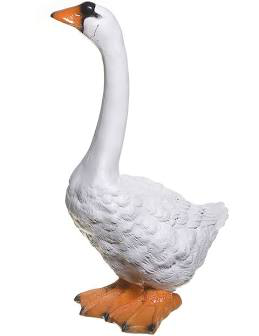

In [6]:
Image.open(filepath)

In [ ]:
class_idx